# Data Cleaning

In [14]:
import pandas as pd
import numpy as np

import glob
import datetime
import gmaps
import matplotlib.pyplot as plt

In [15]:
path = "../Resources/Airbnb/Current_Listing/listings.csv"
hotel_path = "../Resources/Hotel/hotel_data.csv"
listing_df = pd.read_csv(path, low_memory = False)
hotel_df = pd.read_csv(hotel_path)
hotel_df.head()

,City,District,ADR,Month
0,Manhattan,Battery Park City,$100,Jun-18
1,Manhattan,Chelsea,$100,Jun-18
2,Manhattan,East Village,$100,Jun-18
3,Manhattan,Greenwich Village,$100,Jun-18
4,Manhattan,Hell's Kitchen,$100,Jun-18


In [16]:
cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "city", "state", "zipcode", 'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', "amenities",
        'price', 'cleaning_fee','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost","host_response_time","host_response_rate"]
listing_rdc_df = listing_df[cols]
listing_rdc_df.head()

,id,name,host_since,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,host_is_superhost,host_response_time,host_response_rate
0,2539,Clean & quiet apt home by the park,2008-09-07,Kensington,Brooklyn,NY,11218,40.64749,-73.97237,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,f,f,within an hour,100%
1,2595,Skylit Midtown Castle,2008-09-09,Midtown,New York,NY,10018,40.75362,-73.98377,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a few hours,83%
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,2008-11-25,Harlem,New York,NY,10027,40.80902,-73.94190,Apartment,...,NaN,NaN,NaN,NaN,NaN,f,f,f,within a day,100%
3,3831,Cozy Entire Floor of Brownstone,2008-12-07,Clinton Hill,Brooklyn,NY,11238,40.68514,-73.95976,Guest suite,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within an hour,100%
4,4989,Great 1 bdrm. apartment in the PERFECT location!,2009-01-26,Hell's Kitchen,New York,NY,10036,40.76260,-73.99304,Apartment,...,9.0,10.0,10.0,10.0,9.0,f,f,f,within a day,50%


In [17]:
dropna_cols = ["id", "name", "host_since", 
        "neighbourhood_cleansed", "zipcode", 'latitude', 'longitude','amenities',
        'property_type', 'room_type', 'accommodates',
        'price','minimum_nights', 'maximum_nights',
        'number_of_reviews','review_scores_rating',
        'instant_bookable','is_business_travel_ready',
        "host_is_superhost", 'amenities']
fill_0_cols = ['cleaning_fee']
listing_rdc_dna_df = listing_rdc_df.dropna(subset = dropna_cols)
listing_rdc_dna_df["cleaning_fee"] = listing_rdc_dna_df["cleaning_fee"].fillna(0)

renamed_listing = listing_rdc_dna_df.rename(index=str, columns = {"id":"ID", "name":"AirBnb Name", "host_since":"Host Since", 
        "neighbourhood_cleansed":"Neighbourhood", "zipcode":"Zipcode", 'latitude':"Latitude", 'longitude':"Longitude",'amenities':"Amenities",
        'property_type':"Property Type", 'room_type':"Room Type", 'accommodates':"Accommodates",
        'price':"Price",'minimum_nights':"Min Nights", 'maximum_nights':"Max Nights",
        'number_of_reviews':"# of Reviews",'review_scores_rating':"Review Score", "host_response_time":"Host Response Time","host_response_rate":"Host Response Rate",
        'instant_bookable':"Instant Bookable",'is_business_travel_ready':"Business Travel Ready",
        "host_is_superhost":"Superhost", "city":"City", "state":"State", "zipcode":"Zipcode",
        'bathrooms':"Bathrooms", 'bedrooms':"Bedrooms", "cleaning_fee": "Cleaning Fee",
        'review_scores_accuracy': "Accuracy", 'review_scores_cleanliness': "Cleanliness", 'review_scores_checkin': "Check-In Review", 'review_scores_communication':"Communication Review", 
        'review_scores_location':"Location Review", 'review_scores_value':"Value Review"})
renamed_listing.count()

/Users/desanuj/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


ID                       37261
AirBnb Name              37261
Host Since               37261
Neighbourhood            37261
City                     37219
State                    37259
Zipcode                  37261
Latitude                 37261
Longitude                37261
Property Type            37261
Room Type                37261
Accommodates             37261
Bathrooms                37217
Bedrooms                 37242
Amenities                37261
Price                    37261
Cleaning Fee             37261
Min Nights               37261
Max Nights               37261
# of Reviews             37261
Review Score             37261
Accuracy                 37218
Cleanliness              37235
Check-In Review          37199
Communication Review     37223
Location Review          37196
Value Review             37196
Instant Bookable         37261
Business Travel Ready    37261
Superhost                37261
Host Response Time       27026
Host Response Rate       27026
dtype: i

In [18]:
#Removing $ and , from Price and Cleaning Fee to convert them to float
renamed_listing["Price"] = renamed_listing["Price"].str.replace('$', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace('$', '')
renamed_listing["Price"] = renamed_listing["Price"].str.replace(',', '')
renamed_listing["Cleaning Fee"] = renamed_listing["Cleaning Fee"].str.replace(',', '')
renamed_listing["Price"] = renamed_listing["Price"].str.replace('.', '')

renamed_listing[["Price", "Cleaning Fee"]] = renamed_listing[["Price", "Cleaning Fee"]].apply(pd.to_numeric)
renamed_listing.dtypes

ID                         int64
AirBnb Name               object
Host Since                object
Neighbourhood             object
City                      object
State                     object
Zipcode                   object
Latitude                 float64
Longitude                float64
Property Type             object
Room Type                 object
Accommodates               int64
Bathrooms                float64
Bedrooms                 float64
Amenities                 object
Price                      int64
Cleaning Fee             float64
Min Nights                 int64
Max Nights                 int64
# of Reviews               int64
Review Score             float64
Accuracy                 float64
Cleanliness              float64
Check-In Review          float64
Communication Review     float64
Location Review          float64
Value Review             float64
Instant Bookable          object
Business Travel Ready     object
Superhost                 object
Host Respo

In [20]:
#Cleansing Data Further

#Minimum Rating Score of 80
clean_airbnb = renamed_listing[renamed_listing["Review Score"] >= 80].copy()

#Cleanliness & Location Accuracy Should be at least 8
clean_airbnb = clean_airbnb[(clean_airbnb["Cleanliness"] >= 8) & (clean_airbnb["Location Review"] >=8)].copy()

#Total Price combining Cleaning Fee w/ Price
clean_airbnb["Total Price"] = clean_airbnb["Price"] + clean_airbnb["Cleaning Fee"]
clean_airbnb.dtypes

ID                         int64
AirBnb Name               object
Host Since                object
Neighbourhood             object
City                      object
State                     object
Zipcode                   object
Latitude                 float64
Longitude                float64
Property Type             object
Room Type                 object
Accommodates               int64
Bathrooms                float64
Bedrooms                 float64
Amenities                 object
Price                      int64
Cleaning Fee             float64
Min Nights                 int64
Max Nights                 int64
# of Reviews               int64
Review Score             float64
Accuracy                 float64
Cleanliness              float64
Check-In Review          float64
Communication Review     float64
Location Review          float64
Value Review             float64
Instant Bookable          object
Business Travel Ready     object
Superhost                 object
Host Respo

# Airbnb Data Cleaning

# Airbnb Historic Data  
### 1. Number of Listing

In [7]:
def parse_yyyy_mm(start, end):
    for i in range(start, end):
        try: 
            historic_num_listing_df.loc[i, 'yyyy-mm'] = historic_num_listing_df.loc[i, 'host_since'][:7]
        except: 
            print(f"Row {i} failed        ", end = '\r' )
    return historic_num_listing_df

In [33]:
historic_num_listing_col = ['id','host_since','city', 'latitude', 'longitude']
historic_num_listing_df = listing_rdc_df[historic_num_listing_col].dropna()
historic_num_listing_df['yyyy-mm'] = ''

list_range = np.arange(0, len(historic_num_listing_df), 200)

for i in range(len(list_range)-1):
    historic_num_listing_df = parse_yyyy_mm(list_range[i], list_range[i + 1])
    print(f"{i}                ", end = "\r")
    
historic_num_listing_df = parse_yyyy_mm(list_range[-1], len(listing_df))

array(['2008-09', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03',
       '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09',
       '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2011-08',
       '2010-03', '2010-04', '2010-05', '2013-05', '2010-06', '2010-07',
       '2010-08', '2011-07', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2012-07',
       '2012-04', '2011-06', '2012-03', '2011-09', '2013-01', '2011-10',
       '2012-11', '2008-10', '2011-11', '2011-12', '2012-01', '2013-10',
       '2013-04', '2012-02', '2013-12', '2012-06', '2012-05', '2012-08',
       '2012-09', '2012-10', '2014-05', '2012-12', '2013-02', '2013-03',
       '2013-08', '2014-02', '2008-08', '2013-07', '2013-06', '2013-11',
       '2013-09', '2014-04', '2014-06', '', '2014-01', '2014-03',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-08', '2015-02', '2015-03', '2015-0

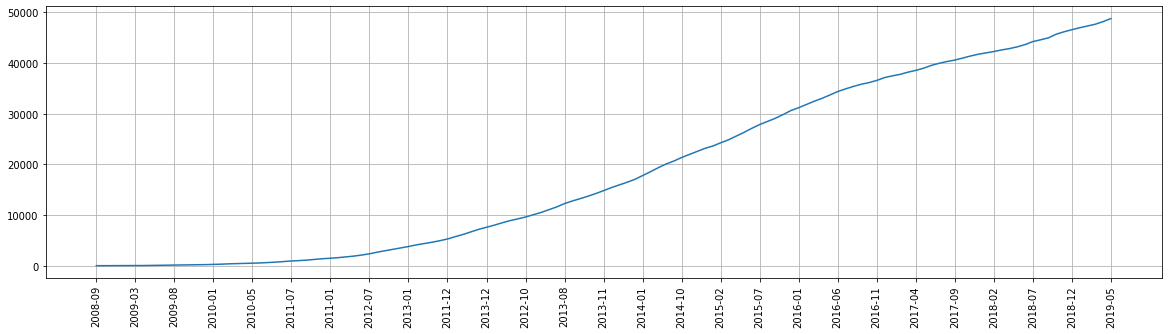

In [49]:
historic_host_since_count_df = historic_num_listing_df.groupby('yyyy-mm').count()
new_list = list(historic_host_since_count_df['id'])

from functools import reduce
accumulate_list = [reduce((lambda x,y : x + y), new_list[:i]) for i in range(1, len(new_list))]
host_since_list = historic_num_listing_df['yyyy-mm'].unique()

plt.figure(figsize = (20,5))
plt.grid(True)
plt.plot(np.arange(len(accumulate_list)), accumulate_list)
plt.xticks(np.arange(0,len(accumulate_list),5), host_since_list[::5], rotation = 90)
plt.show()

### 2. Historic Price

In [10]:
historic_folder_path = "../Resources/Airbnb/New_York_Historic_Data/*.csv"
historic_file_paths = glob.glob(historic_folder_path)

dates = []
historic_cols = ["room_type", 'borough', 'accommodates','price','latitude','longitude', 'last_modified']

historic_df = pd.DataFrame(columns=['date', 
                                    'price', 
                                    'entire_apt_count', 
                                    'private_room_count', 
                                    'share_room_count', 
                                    'Total count'])
i = 0
for path in sorted(historic_file_paths):#sorted(historic_file_paths):
    # date in yyyy-mm-dd
    date = path.split("/")[-1].split("_")[-1].split(".")[0].replace("-","_")
    dates.append(date)
    
    # DataFrame 
    df = pd.read_csv(path)
    df_rdc = df[historic_cols]
    df_rdc['last_modified'] = date
    historic_df.loc[i] = [date,
                          round(df_rdc['price'].mean(),2), 
                          df_rdc.groupby("room_type").count().iloc[0,2], 
                          df_rdc.groupby("room_type").count().iloc[1,2], 
                          df_rdc.groupby("room_type").count().iloc[2,2], 
                          df_rdc.count()['price']]
    i += 1

/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


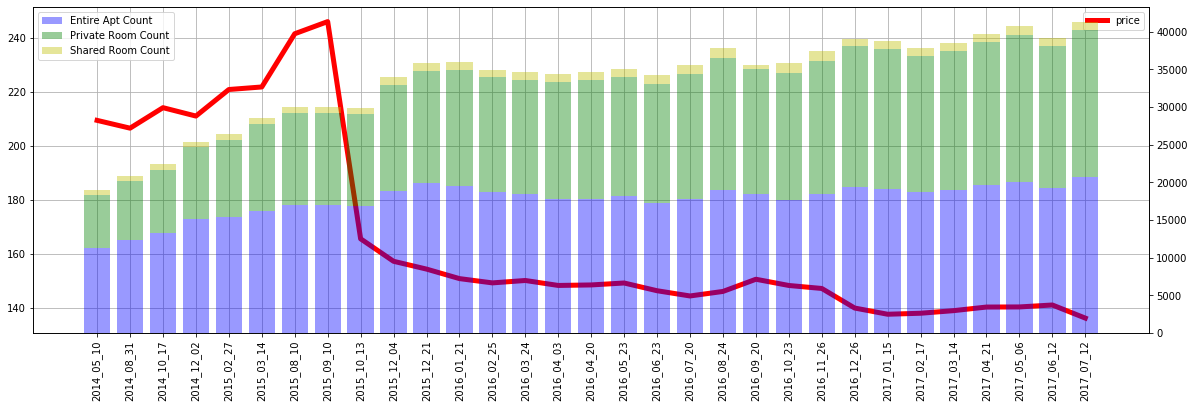

In [11]:
x = np.arange(historic_df.count()[1])
fig, ax1 = plt.subplots(figsize = (20,7))
plt.grid(True)
plt.xlim(-0.75, len(x) - 0.25)
ax1.set_xlabel("\nDate", fontsize = 20)
ax1.set_xticks(np.arange(historic_df.count()[1]))
ax1.set_xticklabels(historic_df['date'], rotation = 90)
ax1.set_ylabel("Listings Count\n", fontsize = 20)

ax1.bar(x, historic_df['entire_apt_count'], color = 'blue', label = 'Entire Apt Count', alpha = 0.4)
ax1.bar(x, historic_df['private_room_count'],
        bottom=historic_df['entire_apt_count'], color = 'green', label = 'Private Room Count', alpha = 0.4)
ax1.bar(x, historic_df['share_room_count'],
        bottom=historic_df['private_room_count'] + historic_df['entire_apt_count'],
        color = 'y', label = 'Shared Room Count', alpha = 0.4)
ax1.set_ylim(0, 50000)

ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x, historic_df['price'], 'ro-', markersize = 10, mec = 'k', linewidth = 5, label = 'price')
for i in range(len(x)):
    ax2.text(x[i] - 0.4, historic_df['price'][i] + 5, "${:.0f}".format(historic_df['price'][i]) , 
             fontsize = 14,weight='bold')
ax2.set_ylabel("\nAverage Listing Price ($) ", fontsize = 20)
ax2.set_ylim(100, 270)

plt.title("Airbnb Listing Count and Average Price ($)\n", fontsize = 20, weight = "bold")
plt.legend()
plt.tight_layout()
plt.show()